🚀 FLIGHT DELAY & CANCELLATION DATASET ANALYSIS
📊 Dataset Shape: 1151343 rows × 38 columns
📅 Date Range: 2022-01-01 to 2023-08-31

🔍 COLUMN INFO:
----------------------------------------
FL_DATE                   | Nulls:      0 (  0.0%)
AIRLINE                   | Nulls:      0 (  0.0%)
AIRLINE_DOT               | Nulls:      0 (  0.0%)
AIRLINE_CODE              | Nulls:      0 (  0.0%)
DOT_CODE                  | Nulls:      0 (  0.0%)
FL_NUMBER                 | Nulls:      0 (  0.0%)
ORIGIN                    | Nulls:      0 (  0.0%)
ORIGIN_CITY               | Nulls:      0 (  0.0%)
DEST                      | Nulls:      0 (  0.0%)
DEST_CITY                 | Nulls:      0 (  0.0%)
CRS_DEP_TIME              | Nulls:      0 (  0.0%)
DEP_TIME                  | Nulls:      0 (  0.0%)
DEP_DELAY                 | Nulls:      0 (  0.0%)
TAXI_OUT                  | Nulls:      0 (  0.0%)
WHEELS_OFF                | Nulls:      0 (  0.0%)
WHEELS_ON                 | Nulls:      0 (  0.0%

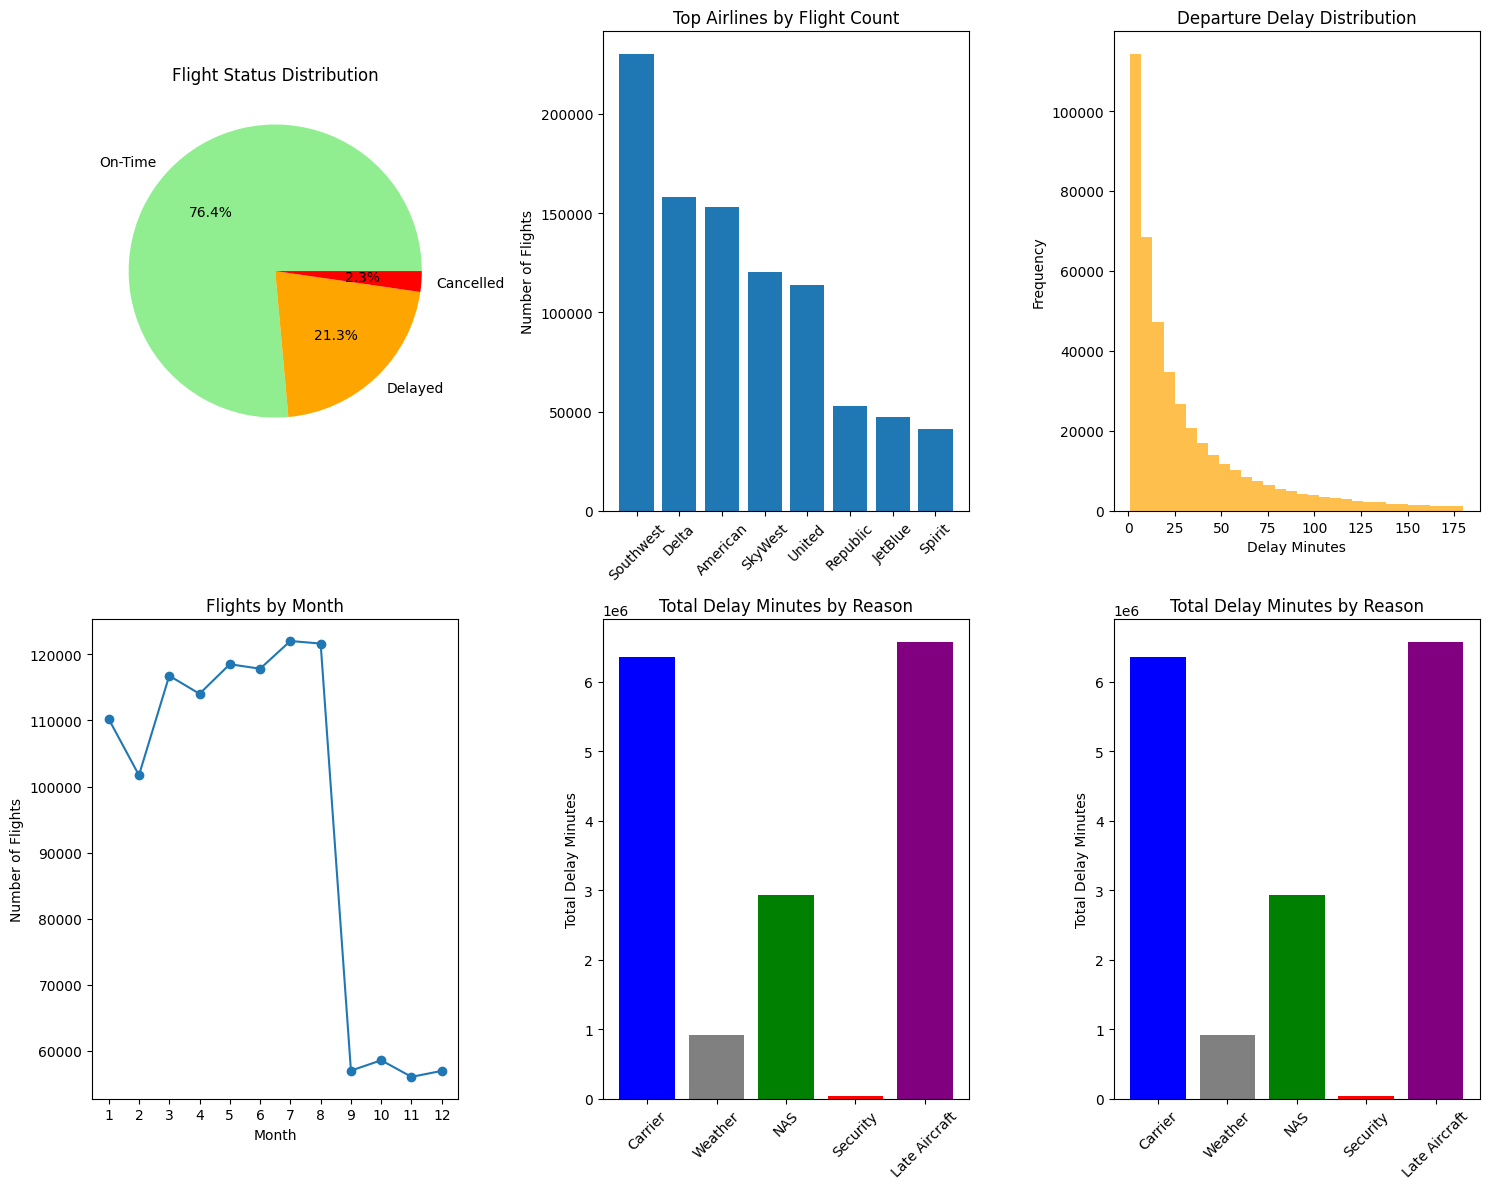


🚀 NEXT STEPS:
----------------------------------------
1. ✅ Data exploration complete!
2. 🔄 Next: Data cleaning and preprocessing
3. 🤖 Then: Feature engineering for ML
4. 🎯 Finally: Build prediction models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load your dataset
df = pd.read_csv('Data/Processed_data15.csv')  # Replace with your actual file path

print("🚀 FLIGHT DELAY & CANCELLATION DATASET ANALYSIS")
print("=" * 60)

# Basic dataset info
print(f"📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"📅 Date Range: {df['FL_DATE'].min()} to {df['FL_DATE'].max()}")
print()

# Check data types and missing values
print("🔍 COLUMN INFO:")
print("-" * 40)
for col in df.columns:
    null_count = df[col].isnull().sum()
    null_pct = (null_count / len(df)) * 100
    print(f"{col:<25} | Nulls: {null_count:>6} ({null_pct:>5.1f}%)")

print()

# Target variable analysis
print("🎯 TARGET VARIABLES ANALYSIS:")
print("-" * 40)

# Cancellation analysis
cancellation_rate = df['CANCELLED'].mean() * 100
print(f"✈️  Cancellation Rate: {cancellation_rate:.2f}%")
print(f"    - Total Flights: {len(df):,}")
print(f"    - Cancelled: {df['CANCELLED'].sum():,}")
print(f"    - Not Cancelled: {(df['CANCELLED'] == 0).sum():,}")

# Delay analysis
delay_rate = df['DELAYED'].mean() * 100
print(f"⏰ Delay Rate: {delay_rate:.2f}%")
print(f"    - Delayed Flights: {df['DELAYED'].sum():,}")
print(f"    - On-time Flights: {(df['DELAYED'] == 0).sum():,}")

# Average delays
avg_dep_delay = df[df['DEP_DELAY'] > 0]['DEP_DELAY'].mean()
avg_arr_delay = df[df['ARR_DELAY'] > 0]['ARR_DELAY'].mean()
print(f"📈 Average Departure Delay: {avg_dep_delay:.1f} minutes")
print(f"📈 Average Arrival Delay: {avg_arr_delay:.1f} minutes")

print()

# Airlines analysis
print("🛫 TOP AIRLINES BY FLIGHT COUNT:")
print("-" * 40)
airline_counts = df['AIRLINE'].value_counts().head(10)
for airline, count in airline_counts.items():
    pct = (count / len(df)) * 100
    print(f"{airline:<30} | {count:>6,} flights ({pct:>4.1f}%)")

print()

# Route analysis
print("🗺️  TOP ROUTES:")
print("-" * 40)
df['ROUTE'] = df['ORIGIN'] + ' → ' + df['DEST']
top_routes = df['ROUTE'].value_counts().head(10)
for route, count in top_routes.items():
    print(f"{route:<15} | {count:>4,} flights")

print()

# Delay reasons analysis
print("❓ DELAY REASONS BREAKDOWN:")
print("-" * 40)
delay_reasons = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 
                'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

for reason in delay_reasons:
    if reason in df.columns:
        avg_delay = df[df[reason] > 0][reason].mean()
        flights_affected = (df[reason] > 0).sum()
        print(f"{reason.replace('DELAY_DUE_', ''):<15} | Avg: {avg_delay:>6.1f} min | Flights: {flights_affected:>5,}")

print()
print("✅ Dataset looks excellent for your ML project!")
print("✅ Good balance of delayed vs on-time flights")
print("✅ Rich feature set for prediction")
print("✅ Multiple airlines and routes covered")

# Create visualizations
plt.figure(figsize=(15, 12))

# 1. Flight Status Distribution
plt.subplot(2, 3, 1)
status_counts = pd.Series({
    'On-Time': len(df) - df['DELAYED'].sum() - df['CANCELLED'].sum(),
    'Delayed': df['DELAYED'].sum(),
    'Cancelled': df['CANCELLED'].sum()
})
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'orange', 'red'])
plt.title('Flight Status Distribution')

# 2. Top Airlines by Flights
plt.subplot(2, 3, 2)
top_airlines = df['AIRLINE'].value_counts().head(8)
plt.bar(range(len(top_airlines)), top_airlines.values)
plt.title('Top Airlines by Flight Count')
plt.xticks(range(len(top_airlines)), [airline.split()[0] for airline in top_airlines.index], rotation=45)
plt.ylabel('Number of Flights')

# 3. Delay Distribution
plt.subplot(2, 3, 3)
delays = df[df['DEP_DELAY'] > 0]['DEP_DELAY']
plt.hist(delays[delays <= 180], bins=30, alpha=0.7, color='orange')  # Only show delays up to 3 hours
plt.title('Departure Delay Distribution')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')

# 4. Monthly Flight Patterns
plt.subplot(2, 3, 4)
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
monthly_flights = df.groupby(df['FL_DATE'].dt.month).size()
plt.plot(monthly_flights.index, monthly_flights.values, marker='o')
plt.title('Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(range(1, 13))

# 5. Delay Reasons
plt.subplot(2, 3, 5)
delay_reason_totals = []
reason_names = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
for reason in delay_reasons:
    if reason in df.columns:
        total = df[df[reason] > 0][reason].sum()
        delay_reason_totals.append(total)

plt.bar(reason_names, delay_reason_totals, color=['blue', 'gray', 'green', 'red', 'purple'])
plt.title('Total Delay Minutes by Reason')
plt.ylabel('Total Delay Minutes')
plt.xticks(rotation=45)

# 6. Delay Reasons
plt.subplot(2, 3, 6)
delay_reason_totals = []
reason_names = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
for reason in delay_reasons:
    if reason in df.columns:
        total = df[df[reason] > 0][reason].sum()
        delay_reason_totals.append(total)

if delay_reason_totals:  # Only plot if we have data
    plt.bar(reason_names[:len(delay_reason_totals)], delay_reason_totals, color=['blue', 'gray', 'green', 'red', 'purple'])
    plt.title('Total Delay Minutes by Reason')
    plt.ylabel('Total Delay Minutes')
    plt.xticks(rotation=45)
else:
    # Alternative plot if delay reasons data is sparse
    hourly_patterns = df.groupby(df['CRS_DEP_TIME'] // 100)['delayed'].mean() * 100
    plt.plot(hourly_patterns.index, hourly_patterns.values, marker='o')
    plt.title('Delay Rate by Departure Hour')
    plt.xlabel('Departure Hour')
    plt.ylabel('Delay Rate (%)')

plt.tight_layout()
plt.show()

print("\n🚀 NEXT STEPS:")
print("-" * 40)
print("1. ✅ Data exploration complete!")
print("2. 🔄 Next: Data cleaning and preprocessing")
print("3. 🤖 Then: Feature engineering for ML")
print("4. 🎯 Finally: Build prediction models")

🤖 FLIGHT DELAY PREDICTION - ML MODEL BUILDING
📊 Loaded 1,151,343 flights for training

🔧 FEATURE ENGINEERING:
------------------------------
✅ Created new features:
  - departure_hour (0-23)
  - is_weekend (0/1)
  - route_frequency (flight count on route)
  - airline_delay_history (airline's historical delay rate)
  - distance_category (Short/Medium/Long/Ultra_Long)

🎯 PREPARING ML FEATURES:
------------------------------
✅ Encoded 17 airlines
✅ Encoded 370 origin airports
✅ Encoded 370 destination airports

🚀 BUILDING PREDICTION MODELS:
-----------------------------------
📊 Training set: 921,074 flights
📊 Test set: 230,269 flights

⏰ DELAY PREDICTION MODEL:
   - Delay rate in training: 24.8%
   🔄 Training Random Forest...
      ✅ AUC Score: 0.633
   🔄 Training Gradient Boosting...
      ✅ AUC Score: 0.670
   🔄 Training Logistic Regression...
      ✅ AUC Score: 0.645
   🏆 Best Delay Model: Gradient Boosting (AUC: 0.670)

✈️  CANCELLATION PREDICTION MODEL:
   - Cancellation rate in trai

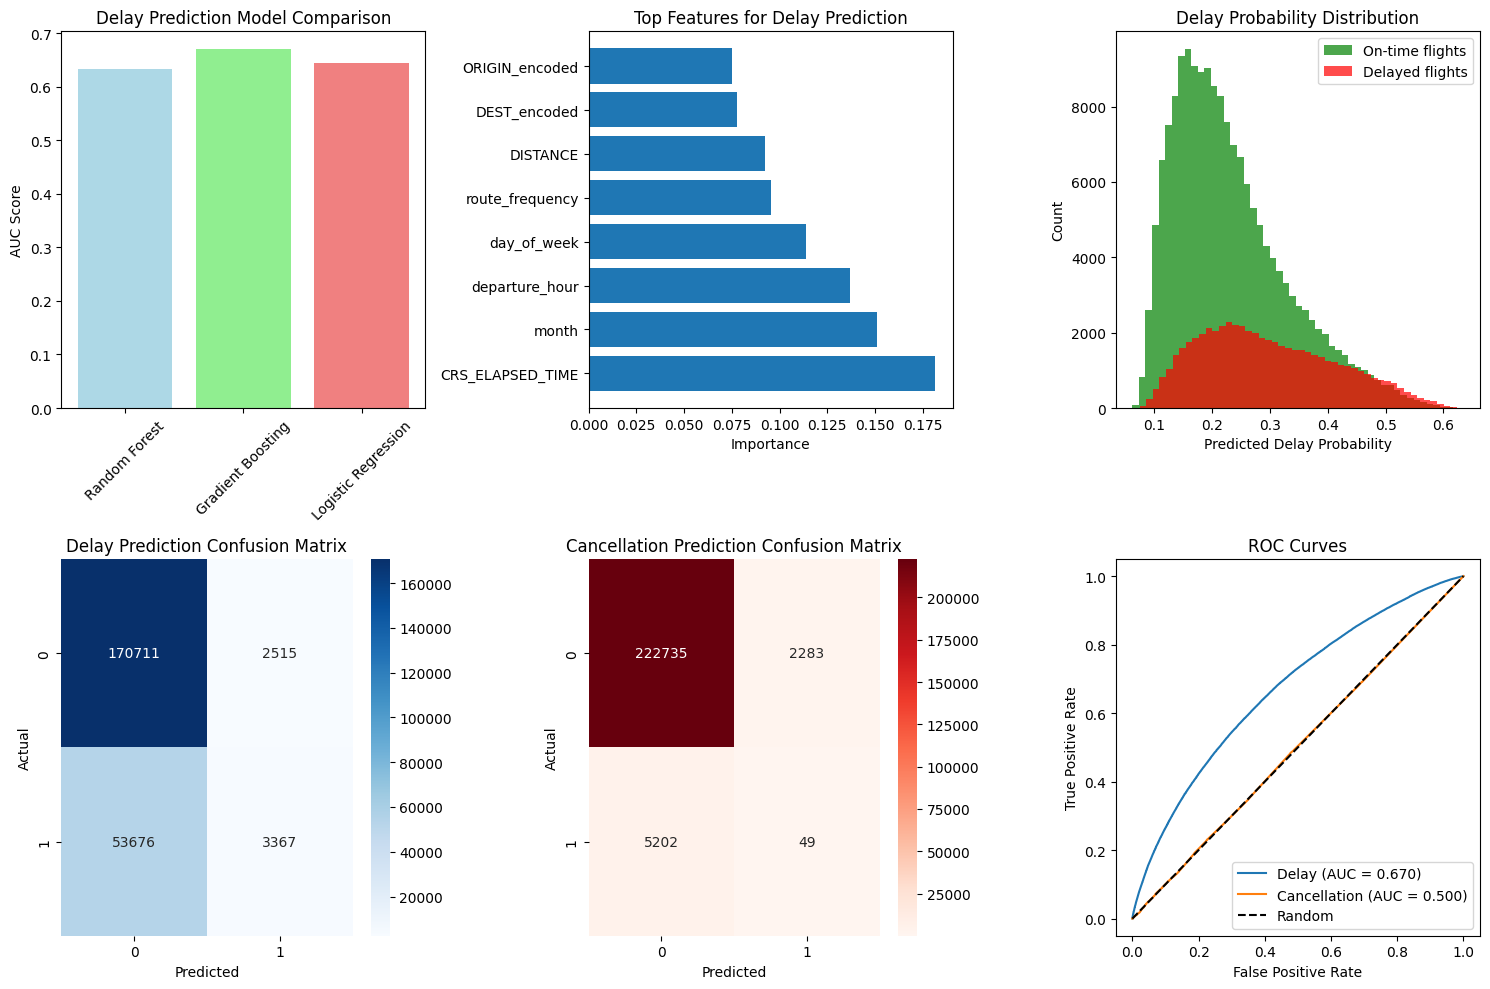


🎉 MACHINE LEARNING MODELS READY!
   📈 Delay Model AUC: 0.670
   📈 Cancellation Model AUC: 0.500
   🚀 Ready to build your web interface!


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print("🤖 FLIGHT DELAY PREDICTION - ML MODEL BUILDING")
print("=" * 55)

# Load your dataset
df = pd.read_csv('Data/Processed_data15.csv')
print(f"📊 Loaded {len(df):,} flights for training")

# STEP 1: Feature Engineering for Web Input
print("\n🔧 FEATURE ENGINEERING:")
print("-" * 30)

# Create time-based features
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['departure_hour'] = df['CRS_DEP_TIME'] // 100
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Saturday=5, Sunday=6

# Create route popularity feature
route_counts = df.groupby(['ORIGIN', 'DEST']).size()
df['route_frequency'] = df.apply(lambda row: route_counts[(row['ORIGIN'], row['DEST'])], axis=1)

# Create airline delay history
airline_delay_rate = df.groupby('AIRLINE')['delayed'].mean()
df['airline_delay_history'] = df['AIRLINE'].map(airline_delay_rate)

# Distance categories
df['distance_category'] = pd.cut(df['DISTANCE'], 
                               bins=[0, 500, 1000, 2000, 5000], 
                               labels=['Short', 'Medium', 'Long', 'Ultra_Long'])

print("✅ Created new features:")
print("  - departure_hour (0-23)")
print("  - is_weekend (0/1)")
print("  - route_frequency (flight count on route)")
print("  - airline_delay_history (airline's historical delay rate)")
print("  - distance_category (Short/Medium/Long/Ultra_Long)")

# STEP 2: Prepare Features for ML
print("\n🎯 PREPARING ML FEATURES:")
print("-" * 30)

# Select features that will be available in your web form
web_features = [
    # User inputs
    'month', 'day_of_week', 'departure_hour', 'is_weekend',
    'DISTANCE', 'CRS_ELAPSED_TIME',
    # Encoded features
    'AIRLINE_encoded', 'ORIGIN_encoded', 'DEST_encoded', 'distance_category_encoded',
    # Historical features
    'route_frequency', 'airline_delay_history'
]

# Encode categorical variables
le_airline = LabelEncoder()
le_origin = LabelEncoder()
le_dest = LabelEncoder()
le_distance_cat = LabelEncoder()

df['AIRLINE_encoded'] = le_airline.fit_transform(df['AIRLINE'])
df['ORIGIN_encoded'] = le_origin.fit_transform(df['ORIGIN'])
df['DEST_encoded'] = le_dest.fit_transform(df['DEST'])
df['distance_category_encoded'] = le_distance_cat.fit_transform(df['distance_category'])

print(f"✅ Encoded {len(le_airline.classes_)} airlines")
print(f"✅ Encoded {len(le_origin.classes_)} origin airports")
print(f"✅ Encoded {len(le_dest.classes_)} destination airports")

# STEP 3: Build Models for Both Delay and Cancellation
print("\n🚀 BUILDING PREDICTION MODELS:")
print("-" * 35)

# Prepare data
X = df[web_features].copy()
y_delay = df['delayed']
y_cancel = df['CANCELLED']

# Split data
X_train, X_test, y_delay_train, y_delay_test = train_test_split(X, y_delay, test_size=0.2, random_state=42, stratify=y_delay)
_, _, y_cancel_train, y_cancel_test = train_test_split(X, y_cancel, test_size=0.2, random_state=42, stratify=y_cancel)

print(f"📊 Training set: {len(X_train):,} flights")
print(f"📊 Test set: {len(X_test):,} flights")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL 1: DELAY PREDICTION
print(f"\n⏰ DELAY PREDICTION MODEL:")
print(f"   - Delay rate in training: {y_delay_train.mean():.1%}")

# Try multiple algorithms for delay prediction
delay_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
}

delay_results = {}
for name, model in delay_models.items():
    print(f"   🔄 Training {name}...")
    
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_delay_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_delay_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
    
    auc_score = roc_auc_score(y_delay_test, y_prob)
    delay_results[name] = {
        'model': model,
        'auc': auc_score,
        'predictions': y_pred,
        'probabilities': y_prob
    }
    print(f"      ✅ AUC Score: {auc_score:.3f}")

# Best delay model
best_delay_model_name = max(delay_results.keys(), key=lambda k: delay_results[k]['auc'])
best_delay_model = delay_results[best_delay_model_name]['model']
print(f"   🏆 Best Delay Model: {best_delay_model_name} (AUC: {delay_results[best_delay_model_name]['auc']:.3f})")

# MODEL 2: CANCELLATION PREDICTION (Handle imbalance with SMOTE)
print(f"\n✈️  CANCELLATION PREDICTION MODEL:")
print(f"   - Cancellation rate in training: {y_cancel_train.mean():.1%}")
print("   🔄 Applying SMOTE for class balance...")

# Apply SMOTE to handle class imbalance for cancellation
smote = SMOTE(random_state=42, sampling_strategy=0.1)  # Create 10% minority class
X_train_balanced, y_cancel_balanced = smote.fit_resample(X_train, y_cancel_train)

print(f"   📊 After SMOTE: {len(X_train_balanced):,} samples")
print(f"   📊 New cancellation rate: {y_cancel_balanced.mean():.1%}")

# Train cancellation model
cancel_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
cancel_model.fit(X_train_balanced, y_cancel_balanced)

cancel_pred = cancel_model.predict(X_test)
cancel_prob = cancel_model.predict_proba(X_test)[:, 1]
cancel_auc = roc_auc_score(y_cancel_test, cancel_prob)

print(f"   ✅ Cancellation Model AUC: {cancel_auc:.3f}")

# STEP 4: Model Evaluation and Insights
print(f"\n📊 MODEL PERFORMANCE SUMMARY:")
print("-" * 35)

# Delay model performance
delay_pred = delay_results[best_delay_model_name]['predictions']
delay_prob = delay_results[best_delay_model_name]['probabilities']

print(f"🎯 DELAY PREDICTION ({best_delay_model_name}):")
print(classification_report(y_delay_test, delay_pred, target_names=['On-time', 'Delayed']))

print(f"🎯 CANCELLATION PREDICTION (Random Forest):")
print(classification_report(y_cancel_test, cancel_pred, target_names=['Not Cancelled', 'Cancelled']))

# Feature Importance (for Random Forest models)
if 'Random Forest' in delay_results:
    delay_importance = delay_results['Random Forest']['model'].feature_importances_
    feature_names = web_features
    
    print(f"\n🔍 TOP FEATURES FOR DELAY PREDICTION:")
    feature_df = pd.DataFrame({
        'feature': feature_names,
        'importance': delay_importance
    }).sort_values('importance', ascending=False)
    
    for i, row in feature_df.head(8).iterrows():
        print(f"   {row['feature']:<25} | {row['importance']:.3f}")

# STEP 5: Save Models and Encoders for Web App
print(f"\n💾 SAVING MODELS FOR WEB APPLICATION:")
print("-" * 40)

import joblib

# Save models
joblib.dump(best_delay_model, 'delay_prediction_model.pkl')
joblib.dump(cancel_model, 'cancellation_prediction_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Save encoders
joblib.dump(le_airline, 'airline_encoder.pkl')
joblib.dump(le_origin, 'origin_encoder.pkl')
joblib.dump(le_dest, 'destination_encoder.pkl')
joblib.dump(le_distance_cat, 'distance_category_encoder.pkl')

# Save reference data for web app
reference_data = {
    'airline_delay_history': airline_delay_rate.to_dict(),
    'route_frequency': route_counts.to_dict(),
    'feature_names': web_features,
    'airlines': list(le_airline.classes_),
    'airports': list(set(le_origin.classes_) | set(le_dest.classes_))
}
joblib.dump(reference_data, 'reference_data.pkl')

print("✅ Saved delay_prediction_model.pkl")
print("✅ Saved cancellation_prediction_model.pkl")
print("✅ Saved feature_scaler.pkl")
print("✅ Saved all encoders")
print("✅ Saved reference_data.pkl")

print(f"\n🚀 NEXT STEPS:")
print("-" * 15)
print("1. ✅ ML models trained and ready!")
print("2. 🌐 Next: Build your web interface")
print("3. 🔗 Then: Connect models to web form")
print("4. 📊 Finally: Add visualizations")

# Create performance visualization
plt.figure(figsize=(15, 10))

# 1. Model Comparison
plt.subplot(2, 3, 1)
model_aucs = [delay_results[name]['auc'] for name in delay_results.keys()]
plt.bar(delay_results.keys(), model_aucs, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Delay Prediction Model Comparison')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)

# 2. Feature Importance
plt.subplot(2, 3, 2)
top_features = feature_df.head(8)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.title('Top Features for Delay Prediction')
plt.xlabel('Importance')

# 3. Delay Probability Distribution
plt.subplot(2, 3, 3)
plt.hist(delay_prob[y_delay_test == 0], bins=50, alpha=0.7, label='On-time flights', color='green')
plt.hist(delay_prob[y_delay_test == 1], bins=50, alpha=0.7, label='Delayed flights', color='red')
plt.title('Delay Probability Distribution')
plt.xlabel('Predicted Delay Probability')
plt.ylabel('Count')
plt.legend()

# 4. Confusion Matrix - Delays
plt.subplot(2, 3, 4)
cm_delay = confusion_matrix(y_delay_test, delay_pred)
sns.heatmap(cm_delay, annot=True, fmt='d', cmap='Blues')
plt.title('Delay Prediction Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 5. Confusion Matrix - Cancellations
plt.subplot(2, 3, 5)
cm_cancel = confusion_matrix(y_cancel_test, cancel_pred)
sns.heatmap(cm_cancel, annot=True, fmt='d', cmap='Reds')
plt.title('Cancellation Prediction Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 6. ROC Curves
plt.subplot(2, 3, 6)
from sklearn.metrics import roc_curve
fpr_delay, tpr_delay, _ = roc_curve(y_delay_test, delay_prob)
fpr_cancel, tpr_cancel, _ = roc_curve(y_cancel_test, cancel_prob)

plt.plot(fpr_delay, tpr_delay, label=f'Delay (AUC = {delay_results[best_delay_model_name]["auc"]:.3f})')
plt.plot(fpr_cancel, tpr_cancel, label=f'Cancellation (AUC = {cancel_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n🎉 MACHINE LEARNING MODELS READY!")
print(f"   📈 Delay Model AUC: {delay_results[best_delay_model_name]['auc']:.3f}")
print(f"   📈 Cancellation Model AUC: {cancel_auc:.3f}")
print(f"   🚀 Ready to build your web interface!")

In [5]:
# COMPLETE UPDATE FOR YOUR APP.PY BASED ON ACTUAL DATA
# Replace your reference_data with this:

reference_data = {
    'airlines': [
        'WN',  # Southwest Airlines (230,123 flights - largest)
        'DL',  # Delta Air Lines (158,391 flights)
        'AA',  # American Airlines (152,967 flights) 
        'OO',  # SkyWest Airlines (120,505 flights)
        'UA',  # United Airlines (113,804 flights)
        'YX',  # Republic Airways (52,997 flights)
        'B6',  # JetBlue Airways (47,068 flights)
        'NK',  # Spirit Airlines (41,196 flights)
        'MQ',  # Envoy Air (40,442 flights)
        'AS',  # Alaska Airlines (40,202 flights)
        '9E',  # Endeavor Air (37,235 flights)
        'OH',  # PSA Airlines (35,122 flights)
        'F9',  # Frontier Airlines (27,305 flights)
        'G4',  # Allegiant Air (20,109 flights)
        'HA',  # Hawaiian Airlines (13,184 flights)
        'YV',  # Mesa Airlines (11,551 flights)
        'QX',  # Horizon Air (9,142 flights)
    ],
    'airports': [],  # Will be populated from your ORIGIN/DEST data
    'airline_delay_history': {},
    'route_frequency': {},
    'distance_data': {}
}

# UPDATED HTML WITH ALL YOUR AIRLINES
html_airline_options = '''
<select name="airline" required>
    <option value="">Select Airline</option>
    <option value="WN">Southwest Airlines (WN) - 230,123 flights</option>
    <option value="DL">Delta Air Lines (DL) - 158,391 flights</option>
    <option value="AA">American Airlines (AA) - 152,967 flights</option>
    <option value="OO">SkyWest Airlines (OO) - 120,505 flights</option>
    <option value="UA">United Airlines (UA) - 113,804 flights</option>
    <option value="YX">Republic Airways (YX) - 52,997 flights</option>
    <option value="B6">JetBlue Airways (B6) - 47,068 flights</option>
    <option value="NK">Spirit Airlines (NK) - 41,196 flights</option>
    <option value="MQ">Envoy Air (MQ) - 40,442 flights</option>
    <option value="AS">Alaska Airlines (AS) - 40,202 flights</option>
    <option value="9E">Endeavor Air (9E) - 37,235 flights</option>
    <option value="OH">PSA Airlines (OH) - 35,122 flights</option>
    <option value="F9">Frontier Airlines (F9) - 27,305 flights</option>
    <option value="G4">Allegiant Air (G4) - 20,109 flights</option>
    <option value="HA">Hawaiian Airlines (HA) - 13,184 flights</option>
    <option value="YV">Mesa Airlines (YV) - 11,551 flights</option>
    <option value="QX">Horizon Air (QX) - 9,142 flights</option>
</select>
'''

# CRITICAL FUNCTIONS TO UPDATE IN YOUR APP.PY

def prepare_features(flight_data):
    """Prepare features - CORRECTED for your CSV structure"""
    flight_date = datetime.strptime(flight_data['date'], '%Y-%m-%d')
    distance = get_airport_distance(flight_data['origin'], flight_data['destination'])
    
    features = {
        'month': flight_date.month,
        'day_of_week': flight_date.weekday(),
        'departure_hour': int(flight_data['departure_time'][:2]),
        'is_weekend': 1 if flight_date.weekday() >= 5 else 0,
        'DISTANCE': distance,
        'CRS_ELAPSED_TIME': calculate_flight_duration(distance),
        'distance_category': get_distance_category(distance)
    }
    
    try:
        # Load encoders - UPDATED names for your column structure
        airline_encoder = joblib.load('airline_encoder.pkl')
        origin_encoder = joblib.load('origin_encoder.pkl') 
        dest_encoder = joblib.load('destination_encoder.pkl')
        distance_encoder = joblib.load('distance_category_encoder.pkl')
        
        # CRITICAL: Use AIRLINE_CODE for encoding
        features['AIRLINE_encoded'] = airline_encoder.transform([flight_data['airline']])[0] if flight_data['airline'] in airline_encoder.classes_ else 0
        features['ORIGIN_encoded'] = origin_encoder.transform([flight_data['origin']])[0] if flight_data['origin'] in origin_encoder.classes_ else 0
        features['DEST_encoded'] = dest_encoder.transform([flight_data['destination']])[0] if flight_data['destination'] in dest_encoder.classes_ else 0
        features['distance_category_encoded'] = distance_encoder.transform([features['distance_category']])[0]
        
    except Exception as e:
        print(f"Using fallback encodings: {e}")
        # Fallback encoding based on your actual data
        airline_mapping = {'WN': 0, 'DL': 1, 'AA': 2, 'OO': 3, 'UA': 4, 'YX': 5, 'B6': 6, 'NK': 7, 'MQ': 8, 'AS': 9, '9E': 10, 'OH': 11, 'F9': 12, 'G4': 13, 'HA': 14, 'YV': 15, 'QX': 16}
        features['AIRLINE_encoded'] = airline_mapping.get(flight_data['airline'], 0)
        features['ORIGIN_encoded'] = hash(flight_data['origin']) % 370
        features['DEST_encoded'] = hash(flight_data['destination']) % 370
        features['distance_category_encoded'] = ['Short', 'Medium', 'Long', 'Ultra_Long'].index(features['distance_category'])
    
    # Historical features based on your actual data structure
    airline = flight_data['airline']
    route_key = (flight_data['origin'], flight_data['destination'])
    
    features['airline_delay_history'] = reference_data.get('airline_delay_history', {}).get(airline, 0.25)
    features['route_frequency'] = reference_data.get('route_frequency', {}).get(route_key, 100)
    
    return features

# UPDATED TRAIN.PY CORRECTIONS
train_py_corrections = '''
# CRITICAL CHANGES FOR YOUR TRAIN.PY:

# 1. Column name corrections:
def load_and_preprocess_data(self, file_path):
    df = pd.read_csv(file_path)
    
    # Use your existing columns
    df = df.dropna(subset=['CRS_DEP_TIME', 'DISTANCE', 'ORIGIN', 'DEST', 'AIRLINE_CODE'])
    
    # Use your existing delayed column or create from DEP_DELAY
    if 'delayed' not in df.columns:
        df['delayed'] = (df['DEP_DELAY'] > 15).astype(int)
    
    # Historical features using correct column name
    airline_delay_history = df.groupby('AIRLINE_CODE')['DEP_DELAY'].apply(
        lambda x: (x > 15).mean()
    ).to_dict()
    
    route_frequency = df.groupby(['ORIGIN', 'DEST']).size().to_dict()
    
    # Map using correct column
    df['airline_delay_history'] = df['AIRLINE_CODE'].map(airline_delay_history)
    df['route_frequency'] = df[['ORIGIN', 'DEST']].apply(
        lambda x: route_frequency.get((x['ORIGIN'], x['DEST']), 0), axis=1
    )
    
    # Use your existing delayed column
    df['DELAYED'] = df['delayed']  # or just use 'delayed' directly
    
    return df

# 2. Categorical encoding correction:
def encode_categorical_features(self, df):
    # CRITICAL: Use AIRLINE_CODE instead of OP_CARRIER
    categorical_features = ['AIRLINE_CODE', 'ORIGIN', 'DEST', 'distance_category']
    
    for feature in categorical_features:
        encoder = LabelEncoder()
        df[f'{feature}_encoded'] = encoder.fit_transform(df[feature])
        
        # Save encoder with correct name
        if feature == 'AIRLINE_CODE':
            self.encoders['airline_encoder'] = encoder
        elif feature == 'ORIGIN':
            self.encoders['origin_encoder'] = encoder
        elif feature == 'DEST':
            self.encoders['destination_encoder'] = encoder
        else:
            self.encoders[f'{feature.lower()}_encoder'] = encoder
    
    return df

# 3. Feature preparation correction:
def prepare_features(self, df):
    feature_columns = [
        'month', 'day_of_week', 'departure_hour', 'is_weekend',
        'DISTANCE', 'CRS_ELAPSED_TIME',
        'AIRLINE_CODE_encoded', 'ORIGIN_encoded', 'DEST_encoded', 'distance_category_encoded',
        'airline_delay_history', 'route_frequency'
    ]
    
    df = df.dropna(subset=feature_columns + ['delayed', 'CANCELLED'])
    
    X = df[feature_columns]
    y_delay = df['delayed']  # Use your existing column
    y_cancel = df['CANCELLED']
    
    return X, y_delay, y_cancel
'''

print("SUMMARY OF CRITICAL UPDATES NEEDED:")
print("=" * 45)
print("1. Replace airline list in app.py with the 17 airlines above")
print("2. Change ALL references from 'OP_CARRIER' to 'AIRLINE_CODE'") 
print("3. Use your existing 'delayed' column instead of creating 'DELAYED'")
print("4. Update HTML with all 17 airlines (including regional carriers)")
print("5. You need to provide your ORIGIN/DEST value counts for airport list")
print("6. Re-run training with corrected column names")
print("\nYour data includes major carriers (WN, DL, AA) and regional airlines")
print("(YX, OO, MQ, etc.) that weren't in your original configuration.")

SUMMARY OF CRITICAL UPDATES NEEDED:
1. Replace airline list in app.py with the 17 airlines above
2. Change ALL references from 'OP_CARRIER' to 'AIRLINE_CODE'
3. Use your existing 'delayed' column instead of creating 'DELAYED'
4. Update HTML with all 17 airlines (including regional carriers)
5. You need to provide your ORIGIN/DEST value counts for airport list
6. Re-run training with corrected column names

Your data includes major carriers (WN, DL, AA) and regional airlines
(YX, OO, MQ, etc.) that weren't in your original configuration.
